In [1]:
import numpy as np
from cleanlab import Datalab
from datasets import load_dataset

/Users/sanjana/cleanlab_home/fork_cleanlab/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
features = np.load("data/features.npy")
pred_probs = np.load("data/pred_probs.npy")

In [3]:
dataset = load_dataset("imagefolder", data_dir="./data/caltech256-subset", split="train")

Resolving data files: 100%|██████████| 635/635 [00:00<00:00, 159388.57it/s]
Found cached dataset imagefolder (/Users/sanjana/.cache/huggingface/datasets/imagefolder/default-2f665a6adeec287e/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


## Run default Datalab checks

In [4]:
lab = Datalab(data=dataset, label_name="label")
lab.find_issues(features=features, pred_probs=pred_probs)

Finding label issues ...


2023-06-07 22:27:28.506311: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Finding outlier issues ...
Fitting OOD estimator based on provided features ...
Finding near_duplicate issues ...
Finding non_iid issues ...

Audit complete. 51 issues found in the dataset.


In [5]:
lab.report(include_description=False)

Here is a summary of the different kinds of issues found in the data:

    issue_type  num_issues
       outlier          25
near_duplicate          14
         label          11
       non_iid           1

Dataset Information: num_examples: 635, num_classes: 5


---------------------- outlier issues ----------------------

Number of examples with this issue: 25
Overall dataset quality in terms of this issue: 0.7355

Examples representing most severe instances of this issue:
     is_outlier_issue  outlier_score
398              True       0.412073
397              True       0.420990
633              True       0.425188
241              True       0.427850
396              True       0.431380


------------------ near_duplicate issues -------------------

Number of examples with this issue: 14
Overall dataset quality in terms of this issue: 0.2445

Examples representing most severe instances of this issue:
     is_near_duplicate_issue  near_duplicate_score near_duplicate_sets  distance

## Run specific Datalab check

In [6]:
lab = Datalab(data=dataset, label_name="label")
lab.find_issues(features=features, pred_probs=pred_probs, issue_types={"label": {}})

Finding label issues ...

Audit complete. 11 issues found in the dataset.


In [7]:
lab.report(include_description=False)

Here is a summary of the different kinds of issues found in the data:

issue_type  num_issues
     label          11

Dataset Information: num_examples: 635, num_classes: 5


----------------------- label issues -----------------------

Number of examples with this issue: 11
Overall dataset quality in terms of this issue: 0.9827

Examples representing most severe instances of this issue:
     is_label_issue  label_score given_label predicted_label
539            True     0.022090    256.toad        080.frog
9              True     0.022368    080.frog        256.toad
44             True     0.025305    080.frog        256.toad
611            True     0.040939    256.toad        080.frog
98            False     0.043375    080.frog        207.swan


## Run Datalab with empty issue_types dict

In [8]:
lab = Datalab(data=dataset, label_name="label")
lab.find_issues(issue_types={})

/Users/sanjana/cleanlab_home/fork_cleanlab/cleanlab/datalab/datalab.py:284: UserWarning: No issue types were specified. No issues will be found in the dataset.
  warnings.warn("No issue types were specified. No issues will be found in the dataset.")


In [9]:
lab.report()

Please specify some issue types to run in datalab.find_issues() to see the report.



## Run default cleanvision issues

In [10]:
lab = Datalab(data=dataset, label_name="label", image_key="image")
lab.find_issues()

Finding dark, light, low_information, odd_aspect_ratio, odd_size, grayscale, blurry images ...


/Users/sanjana/cleanlab_home/fork_cleanlab/cleanlab/datalab/datalab.py:288: UserWarning: No arguments were passed to Datalab.find_issues().
  warnings.warn("No arguments were passed to Datalab.find_issues().")
100%|██████████| 635/635 [00:28<00:00, 22.38it/s]



Audit complete. 3 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

      issue_type  num_issues
 low_information           2
odd_aspect_ratio           1
          blurry           0
            dark           0
       grayscale           0
           light           0
        odd_size           0

Dataset Information: num_examples: 635, num_classes: 5






------------------ low_information images ------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:



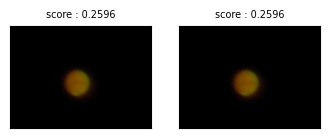

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



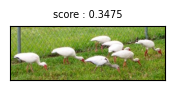

In [11]:
lab.report(include_description=False)

## Run specific cleanvision check

In [12]:
lab = Datalab(data=dataset, label_name="label", image_key="image")
lab.find_issues(issue_types={"image_issue_types": {"dark": {}}})

Finding dark images ...


100%|██████████| 635/635 [00:22<00:00, 28.76it/s] 



Audit complete. 0 issues found in the dataset.


In [14]:
lab.report(include_description=False)

Here is a summary of the different kinds of issues found in the data:

issue_type  num_issues
      dark           0

Dataset Information: num_examples: 635, num_classes: 5








## Run cleanvision issue with custom hyperparameters

In [15]:
lab = Datalab(data=dataset, label_name="label", image_key="image")
lab.find_issues(issue_types={"image_issue_types": {"dark": {"threshold": 0.36}}})

Finding dark images ...


100%|██████████| 635/635 [00:22<00:00, 28.47it/s] 



Audit complete. 3 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

issue_type  num_issues
      dark           3

Dataset Information: num_examples: 635, num_classes: 5






----------------------- dark images ------------------------

Number of examples with this issue: 3
Examples representing most severe instances of this issue:



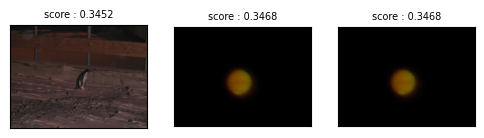

In [16]:
lab.report(include_description=False)

## Run Datalab and cleanvision default checks

In [17]:
lab = Datalab(data=dataset, label_name="label", image_key="image")
lab.find_issues(features=features, pred_probs=pred_probs)

Finding label issues ...
Finding outlier issues ...
Fitting OOD estimator based on provided features ...
Finding near_duplicate issues ...
Finding non_iid issues ...
Finding dark, light, low_information, odd_aspect_ratio, odd_size, grayscale, blurry images ...


100%|██████████| 635/635 [00:23<00:00, 26.68it/s] 



Audit complete. 54 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

      issue_type  num_issues
         outlier          25
  near_duplicate          14
           label          11
 low_information           2
         non_iid           1
odd_aspect_ratio           1
          blurry           0
            dark           0
       grayscale           0
           light           0
        odd_size           0

Dataset Information: num_examples: 635, num_classes: 5


---------------------- outlier issues ----------------------

Number of examples with this issue: 25
Overall dataset quality in terms of this issue: 0.7355

Examples representing most severe instances of this issue:
     is_outlier_issue  outlier_score
398              True       0.412073
397              True       0.420990
633              True       0.425188
241              True       0.427850
396              True       0.431380


------------------ near_duplicate issues -------------------

Number of examples wi

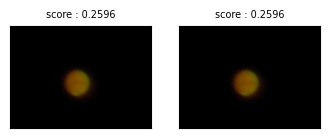

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



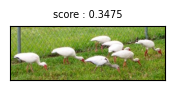

In [18]:
lab.report(include_description=False)

In [19]:
lab.get_issue_summary("low_information")

,issue_type,score,num_issues
0,low_information,NaN,2


In [20]:
lab.get_issues("odd_aspect_ratio")

,is_odd_aspect_ratio_issue,odd_aspect_ratio_score
0,False,0.750000
1,False,0.812236
2,False,0.667188
3,False,0.781250
4,False,0.945634
...,...,...
630,False,0.926573
631,False,0.673469
632,False,0.750623
633,False,0.754491


In [22]:
lab.get_info("label")

{'num_label_issues': 11,
 'average_label_quality': 0.8867957671414914,
 'given_label': array(['080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog', '080.frog', '080.frog', '080.frog',
        '080.frog', '080.frog'

## Run specific Datalab and cleanvision issues

In [23]:
lab = Datalab(data=dataset, label_name="label", image_key="image")
lab.find_issues(features=features, pred_probs=pred_probs, issue_types={"label": {}, "image_issue_types": {"odd_aspect_ratio": {}}})

Finding label issues ...
Finding odd_aspect_ratio images ...


100%|██████████| 635/635 [00:11<00:00, 57.27it/s] 


Audit complete. 12 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

      issue_type  num_issues
           label          11
odd_aspect_ratio           1

Dataset Information: num_examples: 635, num_classes: 5


----------------------- label issues -----------------------

Number of examples with this issue: 11
Overall dataset quality in terms of this issue: 0.9827

Examples representing most severe instances of this issue:
     is_label_issue  label_score given_label predicted_label
539            True     0.022090    256.toad        080.frog
9              True     0.022368    080.frog        256.toad
44             True     0.025305    080.frog        256.toad
611            True     0.040939    256.toad        080.frog
98            False     0.043375    080.frog        207.swan



----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



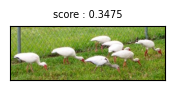

In [24]:
lab.report(include_description=False)

## Incremental search

In [25]:
lab = Datalab(data=dataset, label_name="label", image_key="image")
lab.find_issues(features=features, pred_probs=pred_probs, issue_types={"label": {}})

Finding label issues ...

Audit complete. 11 issues found in the dataset.


In [26]:
lab.report(include_description=False)

Here is a summary of the different kinds of issues found in the data:

issue_type  num_issues
     label          11

Dataset Information: num_examples: 635, num_classes: 5


----------------------- label issues -----------------------

Number of examples with this issue: 11
Overall dataset quality in terms of this issue: 0.9827

Examples representing most severe instances of this issue:
     is_label_issue  label_score given_label predicted_label
539            True     0.022090    256.toad        080.frog
9              True     0.022368    080.frog        256.toad
44             True     0.025305    080.frog        256.toad
611            True     0.040939    256.toad        080.frog
98            False     0.043375    080.frog        207.swan



Please specify some issue_types to check for in imagelab.find_issues().


In [27]:
lab.find_issues(issue_types={"image_issue_types": {"dark": {}}})

Finding dark images ...


100%|██████████| 635/635 [00:21<00:00, 29.18it/s]



Audit complete. 11 issues found in the dataset.


In [28]:
lab.find_issues(issue_types={"image_issue_types": {"dark": {}}})

Finding dark images ...

Audit complete. 11 issues found in the dataset.


/Users/sanjana/cleanlab_home/fork_cleanlab/cleanlab/datalab/adapter/imagelab.py:89: UserWarning: Overwriting columns ['is_dark_issue', 'dark_score'] in self.issues with columns from imagelab.
  warnings.warn(
/Users/sanjana/cleanlab_home/fork_cleanlab/cleanlab/datalab/adapter/imagelab.py:110: UserWarning: Overwriting ['dark'] rows in self.issue_summary from imagelab.
  warnings.warn(
/Users/sanjana/cleanlab_home/fork_cleanlab/cleanlab/datalab/data_issues.py:228: UserWarning: Overwriting key dark in self.info
  warnings.warn(f"Overwriting key {issue_name} in self.info")


In [29]:
lab.report(include_description=False)

Here is a summary of the different kinds of issues found in the data:

issue_type  num_issues
     label          11
      dark           0

Dataset Information: num_examples: 635, num_classes: 5


----------------------- label issues -----------------------

Number of examples with this issue: 11
Overall dataset quality in terms of this issue: 0.9827

Examples representing most severe instances of this issue:
     is_label_issue  label_score given_label predicted_label
539            True     0.022090    256.toad        080.frog
9              True     0.022368    080.frog        256.toad
44             True     0.025305    080.frog        256.toad
611            True     0.040939    256.toad        080.frog
98            False     0.043375    080.frog        207.swan



